In [70]:
import matplotlib
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import re
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from timeit import default_timer as timer

%matplotlib inline

# Gathering data

# 1- Twitter Archive Enhanced 

In [71]:
df_twitter_archive_anhanced = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive_anhanced.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [72]:
df_twitter_archive_anhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

# 2- Downloading image-predictions.tsv programmatically 

In [73]:
 # Using requests library to get "image_predictions.tsv" from Udacity servers
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)
    

In [74]:
# creating dataframe fo 'image-predictions.tsv'
df_image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
df_image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [75]:
#getting info of 'df_image_predictions' dataframe
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# 3- Getting Twitter Data 

In [76]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [77]:
#tweet_ids = df_twitter_archive_anhanced.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)


In [78]:
df_twitter_list = []

with open('tweet_json.txt', 'r', encoding='utf8') as f:
    for line in f:
        tweet_line = json.loads(line)
        df_twitter_list.append({'favorites': tweet_line['favorite_count'],
                       'retweets': tweet_line['retweet_count'],
                       'followers_count': tweet_line['user']['followers_count'],
                       'tweet_id': tweet_line['id']})


In [79]:
# Making dataframe for twitter api data
df_twitter_api = pd.DataFrame(df_twitter_list)

In [80]:
#Testing twitter_api data
df_twitter_api

,favorites,followers_count,retweets,tweet_id
0,35277,8934378,7439,892420643555336193
1,30525,8934378,5528,892177421306343426
2,22954,8934378,3653,891815181378084864
3,38559,8934378,7615,891689557279858688
4,36840,8934378,8196,891327558926688256
5,18572,8934378,2752,891087950875897856
6,10796,8934378,1779,890971913173991426
7,59411,8934378,16634,890729181411237888
8,25555,8934378,3799,890609185150312448
9,29151,8934378,6446,890240255349198849


# Assessment


# 1- df_Twitter_Archive_Enhanced

In [81]:

df_twitter_archive_anhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [82]:
df_twitter_archive_anhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [83]:
df_twitter_archive_anhanced.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
669,790227638568808452,NaN,NaN,2016-10-23 16:25:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Leela. She's a Fetty Wo...,7.626999e+17,4.196984e+09,2016-08-08 17:19:51 +0000,https://twitter.com/dog_rates/status/762699858...,11,10,Leela,None,None,None,None
1659,683098815881154561,NaN,NaN,2016-01-02 01:33:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",aahhhhkslaldhwnxmzbbs 12/10 for being da smoos...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683098815...,12,10,None,None,None,None,None
1267,709566166965075968,NaN,NaN,2016-03-15 02:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Olaf. He's gotta be rare. Seems sturdy...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709566166...,12,10,Olaf,None,None,None,None
1094,736736130620620800,NaN,NaN,2016-05-29 01:49:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chadrick. He's gnarly af 13/10 https:/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/736736130...,13,10,Chadrick,None,None,None,None


In [84]:
df_twitter_archive_anhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [85]:
df_twitter_archive_anhanced.tweet_id.duplicated().sum()

0

In [86]:
#Checking Dog name field
df_twitter_archive_anhanced.name.value_counts()

None           745
a               55
Charlie         12
Oliver          11
Lucy            11
Cooper          11
Tucker          10
Penny           10
Lola            10
Bo               9
Winston          9
the              8
Sadie            8
Bailey           7
Buddy            7
Toby             7
an               7
Daisy            7
Dave             6
Bella            6
Leo              6
Rusty            6
Oscar            6
Jax              6
Milo             6
Scout            6
Jack             6
Stanley          6
Koda             6
Sunny            5
              ... 
Darby            1
Mojo             1
Striker          1
Berkeley         1
Kota             1
Skye             1
Bruiser          1
Pepper           1
Divine           1
Maxwell          1
Caryl            1
Finnegus         1
Harlso           1
Loomis           1
Jeremy           1
Grey             1
Aqua             1
Molly            1
Naphaniel        1
Bauer            1
Crawford         1
Dutch       

In [87]:
lower_names = df_twitter_archive_anhanced.loc[df_twitter_archive_anhanced['name'].str.islower(), ['name']]

lower_names.name.value_counts()

a               55
the              8
an               7
very             5
quite            4
one              4
just             4
mad              2
actually         2
getting          2
not              2
life             1
all              1
such             1
space            1
my               1
this             1
infuriating      1
officially       1
light            1
incredibly       1
by               1
his              1
old              1
unacceptable     1
Name: name, dtype: int64

In [88]:
df_twitter_archive_anhanced['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

# Assessment Issues

# Quality

1- Timestamp Column stored as "object" data type, Should convert to be datetime data type.

2- Tweet_id Column should be converted to Sting data type.

3- There are retweets in the dataset which is not wanted 

4- Drop unwanted columns from dataframe

5- rating_numerator column should change to float data type

6- Extract tweet source from URL in source column.

7- Some dog names not contains actual names such as ('such', 'a', 'quite', 'not', 'one', 'incredibly',..... etc.).

8- Some tweets not related to dogs.




# Tidiness Issues
   - The three datasets must be merged to one dataset by joining them with "tweet_id" column.
   - Dog Stages Column (doggo, floofer, pupper, puppo) Should be merged to one column.

## 2- Image Predections

In [89]:
df_image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [90]:
df_image_predictions.sample

<bound method NDFrame.sample of                 tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    66607119322150

In [91]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [92]:
df_image_predictions.tweet_id.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2045    False
2046    False
2047    False
2048    False
2049    False
2050    False
2051    False
2052    False
2053    False
2054    False
2055    False
2056    False
2057    False
2058    False
2059    False
2060    False
2061    False
2062    False
2063    False
2064    False
2065    False
2066    False
2067    False
2068    False
2069    False
2070    False
2071    False
2072    False
2073    False
2074    False
Name: tweet_id, Length: 2075, dtype: bool

# 3 - Clean Data

# First thing in the cleaning process is to make copy of datasets

In [93]:
#making copy of twitter_archive dataframe
twitter_archive_clean = df_twitter_archive_anhanced.copy()

#making copy of image_predection dataframe
image_predection_clean = df_image_predictions.copy()

#making copy of twitter_api dataframe
twitter_api_clean = df_twitter_api.copy()

# Tidness Issue #1
- Merging all dataframes to one dataframe


# Define: Merge three dataframes to one master dataframe
- Use .merge() to create one large dataframe from the three available dataframes.

# Code

In [94]:
df = pd.merge(twitter_archive_clean, image_predection_clean , left_on ='tweet_id', right_on='tweet_id', how= 'inner')

master_df = pd.merge(df, twitter_api_clean , left_on = 'tweet_id', right_on='tweet_id', how= 'inner')

# Test

In [95]:
#testing new dataframe
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 31 columns):
tweet_id                      2059 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
doggo                         2059 non-null object
floofer                       2059 non-null object
pupper                        2059 non-null object
puppo                         2059 non-null object
jpg_url                       2059 

# Tidness Issue #2
- Merge dog stages in one column nemed 'dog_stage' instead of (doggo, floofer, pupper and puppo)

# Define
- Merge Dog stages into one column
- Drop dog stage unused columns

# Code

In [96]:
# replacing 'None' to ''
master_df.doggo.replace('None', '', inplace = True)
master_df.floofer.replace('None', '', inplace = True)
master_df.pupper.replace('None', '', inplace = True)
master_df.puppo.replace('None', '', inplace = True)

In [97]:
master_df['dog_stage'] = master_df.doggo.str.strip() + master_df.floofer.str.strip() + master_df.pupper.str.strip() + master_df.puppo.str.strip()

In [98]:
master_df['dog_stage'] = master_df['dog_stage'].str.strip()

In [99]:
master_df.dog_stage.value_counts()

                1741
pupper           210
doggo             65
puppo             23
doggopupper       11
floofer            7
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [100]:
# separating dog_stage for dogs that have more than stage with like (doggopupper, doggofloofer and doggopuppo) ','
master_df['dog_stage'] = master_df['dog_stage'].str.replace('doggopupper', 'doggo, pupper')
master_df['dog_stage'] = master_df['dog_stage'].str.replace('doggofloofer', 'doggo, floofer')
master_df['dog_stage'] = master_df['dog_stage'].str.replace('doggopuppo', 'doggo, puppo')

# Test dog_stage column

In [101]:
master_df.dog_stage.value_counts()

                  1741
pupper             210
doggo               65
puppo               23
doggo, pupper       11
floofer              7
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

In [102]:
# drop unusable columns ('floofer', 'puppo', 'doggo', 'pupper')  from dataframe 
master_df.drop(['floofer', 'puppo', 'doggo', 'pupper'], axis=1 , inplace = True)

# Test

In [103]:
#testing dataframe 
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 28 columns):
tweet_id                      2059 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
jpg_url                       2059 non-null object
img_num                       2059 non-null int64
p1                            2059 non-null object
p1_conf                       2059 non-null float64
p1_dog                        2059 

# Quality issues

# 1- Converting timestamp column to datetime instead of object

# Define
- The time stamp column must be stored in datetime datatype for great analysis

# Code

In [104]:
master_df['timestamp'] = pd.to_datetime(master_df['timestamp'])

# Test

In [105]:
#testing
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 28 columns):
tweet_id                      2059 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null datetime64[ns]
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
jpg_url                       2059 non-null object
img_num                       2059 non-null int64
p1                            2059 non-null object
p1_conf                       2059 non-null float64
p1_dog                     

# 2- Converting Tweet_id column to object instead of float


# Define
- Because this column is identifier and not need to make caculations for it, it's better to be string than as a number

# Code

In [106]:
master_df['tweet_id'] = master_df['tweet_id'].astype(str)

# Test

In [107]:
#testing
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 28 columns):
tweet_id                      2059 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null datetime64[ns]
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
jpg_url                       2059 non-null object
img_num                       2059 non-null int64
p1                            2059 non-null object
p1_conf                       2059 non-null float64
p1_dog                    

# 3- Remove retweets from dataset


# Define
- Retweets are not needed for our analysis (Retweets starting with 'RT' in text column) 

# Code

In [108]:
master_df.loc[master_df['text'].str.startswith('RT') == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,followers_count,retweets,dog_stage
32,885311592912609280,NaN,NaN,2017-07-13 01:35:06,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,...,seat_belt,0.057091,False,pug,0.011933,True,0,8934378,16304,
67,877611172832227328,NaN,NaN,2017-06-21 19:36:23,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,...,golden_retriever,0.202907,True,Irish_terrier,0.107473,True,0,8934378,71,pupper
107,867072653475098625,NaN,NaN,2017-05-23 17:40:04,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachaeleasler: these @dog_rates hats are 1...,8.650134e+17,7.874618e+17,2017-05-18 01:17:25 +0000,https://twitter.com/rachaeleasler/status/86501...,...,papillon,0.211766,True,Pekinese,0.112952,True,0,8934377,108,
130,860924035999428608,NaN,NaN,2017-05-06 18:27:40,"<a href=""http://twitter.com/download/iphone"" r...",RT @tallylott: h*ckin adorable promposal. 13/1...,8.609145e+17,3.638908e+08,2017-05-06 17:49:42 +0000,https://twitter.com/tallylott/status/860914485...,...,oscilloscope,0.012591,False,paper_towel,0.011178,False,0,8934377,724,
167,851861385021730816,NaN,NaN,2017-04-11 18:15:55,"<a href=""http://twitter.com/download/iphone"" r...",RT @eddie_coe98: Thanks @dog_rates completed m...,8.482894e+17,3.410211e+08,2017-04-01 21:42:03 +0000,https://twitter.com/eddie_coe98/status/8482893...,...,purse,0.066505,False,pillow,0.044725,False,0,8934376,19,
182,847971574464610304,NaN,NaN,2017-04-01 00:39:12,"<a href=""http://twitter.com/download/iphone"" r...",RT @basic_vacek_: I love my new mug easy 13/10...,8.479710e+17,5.970642e+08,2017-04-01 00:36:55 +0000,https://twitter.com/basic_vacek_/status/847971...,...,cup,0.273392,False,toilet_tissue,0.066656,False,0,8934376,418,
209,841833993020538882,NaN,NaN,2017-03-15 02:10:39,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Ken. His cheeks are mag...,8.174239e+17,4.196984e+09,2017-01-06 17:33:29 +0000,https://twitter.com/dog_rates/status/817423860...,...,Samoyed,0.201358,True,Eskimo_dog,0.186789,True,0,8934383,14417,
220,839290600511926273,NaN,NaN,2017-03-08 01:44:07,"<a href=""http://twitter.com/download/iphone"" r...",RT @alexmartindawg: THE DRINK IS DR. PUPPER 10...,8.392899e+17,4.119842e+07,2017-03-08 01:41:24 +0000,https://twitter.com/alexmartindawg/status/8392...,...,monitor,0.101565,False,screen,0.075306,False,0,8934383,139,pupper
223,838916489579200512,NaN,NaN,2017-03-07 00:57:32,"<a href=""http://twitter.com/download/iphone"" r...",RT @KibaDva: I collected all the good dogs!! 1...,8.389060e+17,8.117408e+08,2017-03-07 00:15:46 +0000,https://twitter.com/KibaDva/status/83890598062...,...,monitor,0.001406,False,envelope,0.001093,False,0,8934384,33,
255,832769181346996225,NaN,NaN,2017-02-18 01:50:19,"<a href=""http://twitter.com/download/iphone"" r...",RT @EmilieGambril: 12/10 h*cking excited about...,8.327664e+17,4.871977e+08,2017-02-18 01:39:12 +0000,https://twitter.com/EmilieGambril/status/83276...,...,sweatshirt,0.089085,False,poncho,0.002975,False,0,8934385,38,


In [109]:
master_df = master_df.loc[master_df['text'].str.startswith('RT') == False]

# Test

In [110]:
# Testing

master_df.loc[master_df['text'].str.startswith('RT') == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,followers_count,retweets,dog_stage


# 4- Drop unwanted columns from dataframe

# Define
- Some columns need to be deleted like ('in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp)

# Code

In [111]:
master_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

# Test

In [112]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2058
Data columns (total 23 columns):
tweet_id              1986 non-null object
timestamp             1986 non-null datetime64[ns]
source                1986 non-null object
text                  1986 non-null object
expanded_urls         1986 non-null object
rating_numerator      1986 non-null int64
rating_denominator    1986 non-null int64
name                  1986 non-null object
jpg_url               1986 non-null object
img_num               1986 non-null int64
p1                    1986 non-null object
p1_conf               1986 non-null float64
p1_dog                1986 non-null bool
p2                    1986 non-null object
p2_conf               1986 non-null float64
p2_dog                1986 non-null bool
p3                    1986 non-null object
p3_conf               1986 non-null float64
p3_dog                1986 non-null bool
favorites             1986 non-null int64
followers_count       1986 non-n

# 5- Change rating_numerator column to float data type


# Define
- some numerator contains decimals so it's better to convert it to float

# Code

In [113]:
master_df['rating_numerator'] = master_df['rating_numerator'].astype(float)

# Test

In [114]:
#testing
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2058
Data columns (total 23 columns):
tweet_id              1986 non-null object
timestamp             1986 non-null datetime64[ns]
source                1986 non-null object
text                  1986 non-null object
expanded_urls         1986 non-null object
rating_numerator      1986 non-null float64
rating_denominator    1986 non-null int64
name                  1986 non-null object
jpg_url               1986 non-null object
img_num               1986 non-null int64
p1                    1986 non-null object
p1_conf               1986 non-null float64
p1_dog                1986 non-null bool
p2                    1986 non-null object
p2_conf               1986 non-null float64
p2_dog                1986 non-null bool
p3                    1986 non-null object
p3_conf               1986 non-null float64
p3_dog                1986 non-null bool
favorites             1986 non-null int64
followers_count       1986 non

# 6- Extract tweet source from URL in source column


# Define
- need to extract tweet source from url stored in source column

# Code

In [115]:
master_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1948
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [116]:
#Split text by with '>'
master_df['source_clean'] = master_df.source.str.split('>', expand = True)[1]
#Extract source after from closing tag
master_df['source_clean'] = master_df.source_clean.str[:-3]
  

# Test

In [117]:
master_df['source_clean'].value_counts()

Twitter for iPhone    1948
Twitter Web Client      28
TweetDeck               10
Name: source_clean, dtype: int64

# 7- Some dog names not contains actual names such as ('such', 'a', 'quite', 'not', 'one', 'incredibly',..... etc.).


# Define
 -  All of them are in lower case, so will find all lower names and make them as 'nan' because we don't need to count them

# Code

In [118]:
lower = master_df.name.str.islower()
master_df.loc[lower, 'name'] = 'None'

#converting lower names to nan using np.nan because we don't need to count them.
master_df.name.replace('None', np.nan, inplace = True)



# Test

In [119]:
#Testing
master_df.name.value_counts()

Cooper        10
Charlie       10
Oliver        10
Tucker         9
Lucy           9
Penny          9
Sadie          8
Winston        8
Lola           7
Daisy          7
Toby           7
Koda           6
Bella          6
Stanley        6
Jax            6
Bo             6
Dave           5
Louis          5
Scout          5
Buddy          5
Rusty          5
Leo            5
Milo           5
Bailey         5
Oscar          5
Chester        5
Finn           4
Jerry          4
Clark          4
Phil           4
              ..
Napolean       1
Timofy         1
Mattie         1
Christoper     1
Leonard        1
Molly          1
Aqua           1
Grey           1
Tommy          1
Lili           1
Ed             1
Blanket        1
Rocco          1
Gustaf         1
Gin            1
DayZ           1
Arlo           1
Kobe           1
Mabel          1
Jeremy         1
Kanu           1
Chase          1
Kingsley       1
Chuck          1
Maxwell        1
Caryl          1
Finnegus       1
Harlso        

In [120]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2058
Data columns (total 24 columns):
tweet_id              1986 non-null object
timestamp             1986 non-null datetime64[ns]
source                1986 non-null object
text                  1986 non-null object
expanded_urls         1986 non-null object
rating_numerator      1986 non-null float64
rating_denominator    1986 non-null int64
name                  1343 non-null object
jpg_url               1986 non-null object
img_num               1986 non-null int64
p1                    1986 non-null object
p1_conf               1986 non-null float64
p1_dog                1986 non-null bool
p2                    1986 non-null object
p2_conf               1986 non-null float64
p2_dog                1986 non-null bool
p3                    1986 non-null object
p3_conf               1986 non-null float64
p3_dog                1986 non-null bool
favorites             1986 non-null int64
followers_count       1986 non

# Some records contains tweets not related to dogs we can know them by "only rate dogs" in text column 


# Define
- we will check for "only rate dogs" in text column and name column without dog name.
- will drop all of them after checking.

# Code

In [121]:
master_df.loc[master_df.name.isnull()& master_df.text.str.match('.*only rate dogs')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,followers_count,retweets,dog_stage,source_clean
24,887101392804085760,2017-07-18 00:07:08,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,https://twitter.com/dog_rates/status/887101392...,12.0,10,NaN,https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg,1,...,0.035029,True,Staffordshire_bullterrier,0.029705,True,28081,8934378,5260,,Twitter for iPhone
53,880872448815771648,2017-06-30 19:35:32,"<a href=""http://twitter.com/download/iphone"" r...",Ugh not again. We only rate dogs. Please don't...,https://twitter.com/dog_rates/status/880872448...,12.0,10,NaN,https://pbs.twimg.com/media/DDl8zzJW0AAisCJ.jpg,1,...,0.061393,True,Chihuahua,0.033726,True,19507,8934378,3377,,Twitter for iPhone
79,874057562936811520,2017-06-12 00:15:36,"<a href=""http://twitter.com/download/iphone"" r...","I can't believe this keeps happening. This, is...",https://twitter.com/dog_rates/status/874057562...,12.0,10,NaN,https://pbs.twimg.com/media/DCFGtdoXkAEsqIw.jpg,1,...,0.040437,True,Newfoundland,0.028228,True,20939,8934378,3541,,Twitter for iPhone
104,867900495410671616,2017-05-26 00:29:37,"<a href=""http://twitter.com/download/iphone"" r...",Unbelievable. We only rate dogs. Please don't ...,https://twitter.com/dog_rates/status/867900495...,12.0,10,NaN,https://pbs.twimg.com/media/DAtm5MkXoAA4R6P.jpg,1,...,0.332461,True,dalmatian,0.032008,True,22494,8934377,3775,,Twitter for iPhone
108,867051520902168576,2017-05-23 16:16:06,"<a href=""http://twitter.com/download/iphone"" r...","Oh my this spooked me up. We only rate dogs, n...",https://twitter.com/dog_rates/status/867051520...,13.0,10,NaN,https://pbs.twimg.com/media/DAhiwb0XcAA8x5Q.jpg,1,...,0.302219,True,Pomeranian,0.156606,True,29905,8934377,7121,,Twitter for iPhone
115,864873206498414592,2017-05-17 16:00:15,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send in Jesus....,https://twitter.com/dog_rates/status/864873206...,14.0,10,NaN,https://pbs.twimg.com/media/DAClmHkXcAA1kSv.jpg,2,...,0.114182,False,wreck,0.055926,False,30044,8934377,7885,,Twitter for iPhone
126,862096992088072192,2017-05-10 00:08:34,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send perfectly...,https://twitter.com/dog_rates/status/862096992...,13.0,10,NaN,https://pbs.twimg.com/media/C_bIo7QXYAAGfPu.jpg,2,...,0.270648,True,Pekinese,0.038110,True,69221,8934377,21105,,Twitter for iPhone
138,859196978902773760,2017-05-02 00:04:57,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,12.0,10,NaN,https://pbs.twimg.com/ext_tw_video_thumb/85919...,1,...,0.216163,True,Persian_cat,0.128383,False,84292,8934377,27712,,Twitter for iPhone
152,855459453768019968,2017-04-21 16:33:22,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",https://twitter.com/dog_rates/status/855459453...,12.0,10,NaN,https://pbs.twimg.com/media/C98z1ZAXsAEIFFn.jpg,2,...,0.188220,True,Japanese_spaniel,0.082628,True,28268,8934376,7683,,Twitter for iPhone
175,849776966551130114,2017-04-06 00:13:11,"<a href=""http://twitter.com/download/iphone"" r...",Seriously guys? Again? We only rate dogs. Plea...,https://twitter.com/dog_rates/status/849776966...,12.0,10,NaN,https://pbs.twimg.com/media/C8sDpDWWsAE5P08.jpg,2,...,0.136852,True,bonnet,0.103111,False,29213,8934376,7187,,Twitter for iPhone


In [122]:
not_dog_related = master_df.loc[master_df.name.isnull()& master_df.text.str.match('.*only rate dogs')]

In [123]:
master_df.drop(not_dog_related.index, axis=0, inplace = True)

# Test

In [124]:
master_df.shape

(1932, 24)

# Storing Clean Dataset to "twitter_archive_master.csv"

In [125]:
master_df.to_csv('twitter_archive_master.csv',encoding='utf-8',index=False)

# Visualization Stage 

# 1- Count of tweets by Source

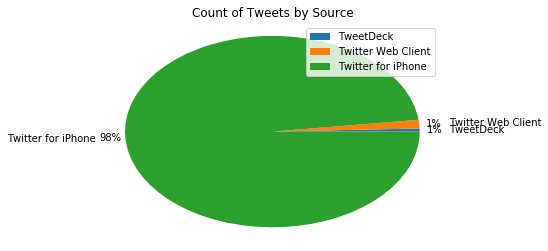

In [126]:
master_df.source_clean.value_counts().sort_values().plot.pie(autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, radius= 1.1)

plt.title('Count of Tweets by Source')
#plt.xlabel('Tweets Count')
plt.ylabel('    ')
plt.legend()



In [127]:
master_df.source_clean.value_counts()/master_df.source_clean.count()*100


Twitter for iPhone    98.033126
Twitter Web Client     1.449275
TweetDeck              0.517598
Name: source_clean, dtype: float64

# Twitter for Iphone is the most source for tweets

# 2- Count of Tweets by Dog Stage

Text(0,0.5,'Tweets Count')

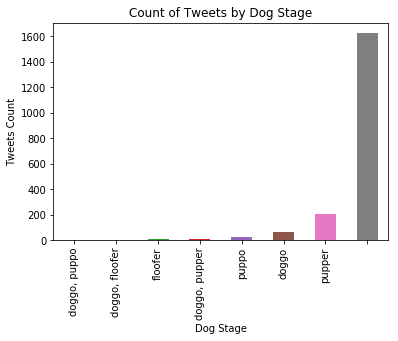

In [128]:
master_df.dog_stage.value_counts().sort_values().plot(kind='bar')
plt.title('Count of Tweets by Dog Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Tweets Count')



In [129]:
master_df.dog_stage.value_counts().sort_values()/master_df.dog_stage.count()*100

doggo, puppo       0.051760
doggo, floofer     0.051760
floofer            0.362319
doggo, pupper      0.465839
puppo              1.138716
doggo              3.209110
pupper            10.507246
                  84.213251
Name: dog_stage, dtype: float64

# Pupper is the most dog stage rated

# 3- Top 10 dog names

Text(0,0.5,'Dog Name')

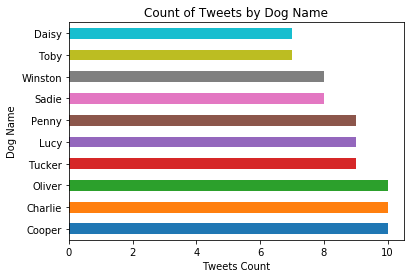

In [130]:
master_df.name.value_counts().sort_values(ascending =False)[:10].plot(kind='barh')
plt.title('Count of Tweets by Dog Name')
plt.xlabel('Tweets Count')
plt.ylabel('Dog Name')

In [131]:
master_df.name.value_counts().sort_values(ascending =False)[:10]/master_df.name.count()*100

Cooper     0.744602
Charlie    0.744602
Oliver     0.744602
Tucker     0.670141
Lucy       0.670141
Penny      0.670141
Sadie      0.595681
Winston    0.595681
Toby       0.521221
Daisy      0.521221
Name: name, dtype: float64

# 4-	Top 10 predicted Dog breeds

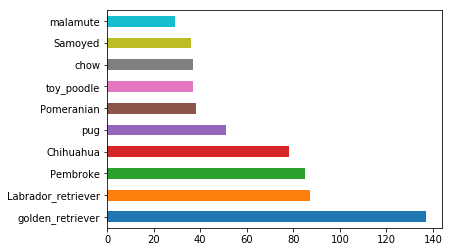

In [132]:
master_df.p1.value_counts().sort_values(ascending =False)[:10].plot.barh()

In [133]:
master_df.p1.value_counts().sort_values(ascending =False)[:10]

golden_retriever      137
Labrador_retriever     87
Pembroke               85
Chihuahua              78
pug                    51
Pomeranian             38
toy_poodle             37
chow                   37
Samoyed                36
malamute               29
Name: p1, dtype: int64